In [1]:
import faiss
import numpy as np

# Définition des paramètres
dimension = 128  # Par exemple, si tes embeddings sont de taille 128
nlist = 100      # Nombre de clusters (ajuste selon la taille des données)

# Création d’un index quantifié
quantizer = faiss.IndexFlatL2(dimension)  # Base de quantification
index = faiss.IndexIVFFlat(quantizer, dimension, nlist)

# Exemple de jeu de données d'entraînement (1000 vecteurs aléatoires)
train_vectors = np.random.rand(1000, dimension).astype(np.float32)

# FAISS doit être entraîné avant d'ajouter des vecteurs
index.train(train_vectors)

# Vérifier si l'index est bien entraîné
print("Index entraîné ?", index.is_trained)  # Doit afficher True


Index entraîné ? True


WARNING clustering 1000 points to 100 centroids: please provide at least 3900 training points


In [2]:
# Génération de 10 000 vecteurs aléatoires à indexer
nb_vects = 10000
data = np.random.rand(nb_vects, dimension).astype(np.float32)

# Ajout des vecteurs dans l'index
index.add(data)

# Vérification
print("Nombre de vecteurs dans l'index :", index.ntotal)  # Doit afficher 10000

# Enregistrer l’index sur le disque
faiss.write_index(index, "index_ivf.faiss")
print("Index sauvegardé ! ✅")


Nombre de vecteurs dans l'index : 10000
Index sauvegardé ! ✅


In [3]:
# Charger l’index depuis le fichier
index = faiss.read_index("index_ivf.faiss")
print("Index chargé ! 🔄")

# Vérifier qu'il est bien chargé
print("Nombre de vecteurs dans l'index :", index.ntotal)


Index chargé ! 🔄
Nombre de vecteurs dans l'index : 10000


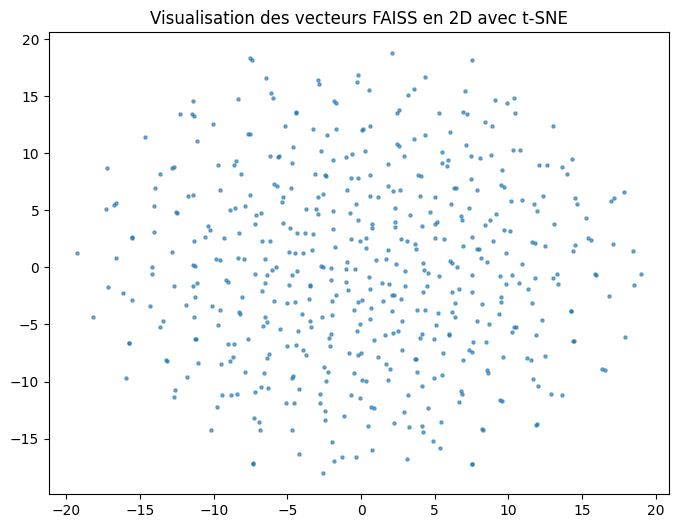

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction en 2D avec TSNE (pense à réduire nb_vects si c'est trop grand)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
vectors_2D = tsne.fit_transform(data[:500])  # On prend seulement 500 points pour éviter que ça rame

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2D[:, 0], vectors_2D[:, 1], s=5, alpha=0.6)
plt.title("Visualisation des vecteurs FAISS en 2D avec t-SNE")
plt.show()


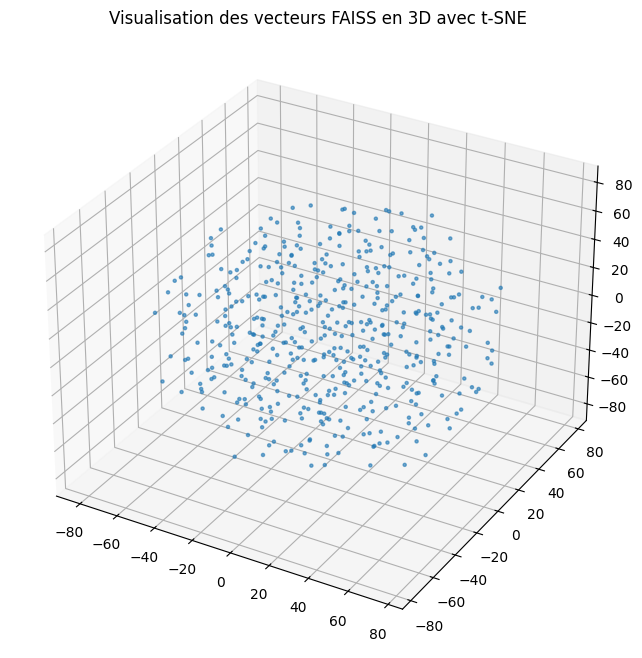

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Réduction en 3D avec TSNE
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
vectors_3D = tsne_3d.fit_transform(data[:500])  # On prend seulement 500 points pour éviter que ça rame

# Affichage
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_3D[:, 0], vectors_3D[:, 1], vectors_3D[:, 2], s=5, alpha=0.6)
ax.set_title("Visualisation des vecteurs FAISS en 3D avec t-SNE")
plt.show()